In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [13]:
df = pd.read_csv("D:\\ml\\CarPrice_Assignment.csv") 
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [14]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [16]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [17]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
print(df)

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         0          5        2         1           0           1        0   
1         1          5        3         1           0           1        0   
2         2          3        1         1           0           1        2   
3         3          4        4         1           0           0        3   
4         4          4        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     200          1      139         1           0           0        3   
201     201          1      138         1           1           0        3   
202     202          1      140         1           0           0        3   
203     203          1      142         0           1           0        3   
204     204          1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  enginesize  fu

In [19]:
df

car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         0          5        2         1           0           1        0   
1         1          5        3         1           0           1        0   
2         2          3        1         1           0           1        2   
3         3          4        4         1           0           0        3   
4         4          4        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     200          1      139         1           0           0        3   
201     201          1      138         1           1           0        3   
202     202          1      140         1           0           0        3   
203     203          1      142         0           1           0        3   
204     204          1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0             2               0          2  ...          18           5   
1             2               0          2  ...          18           5   
2             2               0         10  ...          28           5   
3             1               0         30  ...          11           5   
4             0               0         28  ...          22           5   
..          ...             ...        ...  ...         ...         ...   
200           2               0         46  ...          24           5   
201           2               0         46  ...          24           5   
202           2               0         46  ...          33           5   
203           2               0         46  ...          25           3   
204           2               0         46  ...          24           5   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0           23       4                13          30       10        8   
1           23       4                13          30       10        8   
2            1      28                13          45       10        6   
3           13      25                22          27       16       11   
4           13      25                 5          33       16        5   
..         ...     ...               ...         ...      ...      ...   
200         35      15                20          32       15       10   
201         35      15                11          48       14        6   
202         26       7                12          38       16        5   
203          6      25                31          28        8       13   
204         35      15                20          32       15        6   

     highwaympg  price  
0            10    118  
1            10    137  
2             9    137  
3            13    123  
4             5    148  
..          ...    ...  
200          11    143  
201           8    161  
202           6    165  
203          10    167  
204           8    168  

[205 rows x 26 columns]

In [20]:
df.drop('car_ID',axis=1)

symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0            5        2         1           0           1        0   
1            5        3         1           0           1        0   
2            3        1         1           0           1        2   
3            4        4         1           0           0        3   
4            4        5         1           0           0        3   
..         ...      ...       ...         ...         ...      ...   
200          1      139         1           0           0        3   
201          1      138         1           1           0        3   
202          1      140         1           0           0        3   
203          1      142         0           1           0        3   
204          1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
0             2               0          2         22  ...          18   
1             2               0          2         22  ...          18   
2             2               0         10         29  ...          28   
3             1               0         30         45  ...          11   
4             0               0         28         45  ...          22   
..          ...             ...        ...        ...  ...         ...   
200           2               0         46         63  ...          24   
201           2               0         46         63  ...          24   
202           2               0         46         63  ...          33   
203           2               0         46         63  ...          25   
204           2               0         46         63  ...          24   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0             5         23       4                13          30       10   
1             5         23       4                13          30       10   
2             5          1      28                13          45       10   
3             5         13      25                22          27       16   
4             5         13      25                 5          33       16   
..          ...        ...     ...               ...         ...      ...   
200           5         35      15                20          32       15   
201           5         35      15                11          48       14   
202           5         26       7                12          38       16   
203           3          6      25                31          28        8   
204           5         35      15                20          32       15   

     citympg  highwaympg  price  
0          8          10    118  
1          8          10    137  
2          6           9    137  
3         11          13    123  
4          5           5    148  
..       ...         ...    ...  
200       10          11    143  
201        6           8    161  
202        5           6    165  
203       13          10    167  
204        6           8    168  

[205 rows x 25 columns]

In [21]:
X=df.drop('price',axis=1)
y=df['price']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
tracdt = model.score(X_train, y_train)
print("Accuracy of the train data",tracdt*100)

y_test_pred = model.predict(X_test)
print("Accuracy of the testing",y_train_pred*100)


Accuracy of the train data 91.78111280100654
Accuracy of the testing [11411.48183196 14260.50477297  2759.71352519  2648.39185743
  5718.66735725  4026.23953236  3080.73101391 14633.56575305
 11171.95286133  2424.7013167  14228.85428201  3688.12852278
  6944.98896295  2494.9680165  11509.40755236 10759.11448785
 10570.02609877 18602.18794507  1367.85883738  5838.34410439
 14025.96331056  8392.89948151 15307.26062729  9804.46004883
  1910.84906633 12546.09639988  3830.02775073 13386.40992689
  6744.13540189  2695.02009631 14928.23014719  3546.78573053
  2235.60283002 14640.57776105  8025.05915022 10072.86892436
 11069.43712994  3054.5182076   5953.23046179  3550.55349192
 15141.14954886 13748.33676314 15208.59661835 14127.75672143
  2709.3883152  11258.81451441  3399.639006   17787.60236139
  6018.09122664  2351.00992144  3260.22695521 14317.58872635
  6938.25087958  2862.89178035 12934.10939715  9931.98170496
  2627.7256853  12076.43611997 14762.12896018  2458.5645297
 14911.87671399  

In [31]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE) - Training: {mse_train}")
print(f"Mean Squared Error (MSE) - Testing: {mse_test}")
print(f"R-squared (R2) Score - Training: {r2_train}")
print(f"R-squared (R2) Score - Testing: {r2_test}")

Mean Squared Error (MSE) - Training: 245.46849490039517
Mean Squared Error (MSE) - Testing: 322.71417565979516
R-squared (R2) Score - Training: 0.9178111280100654
R-squared (R2) Score - Testing: 0.8843112149261646


<Figure size 1000x600 with 0 Axes>

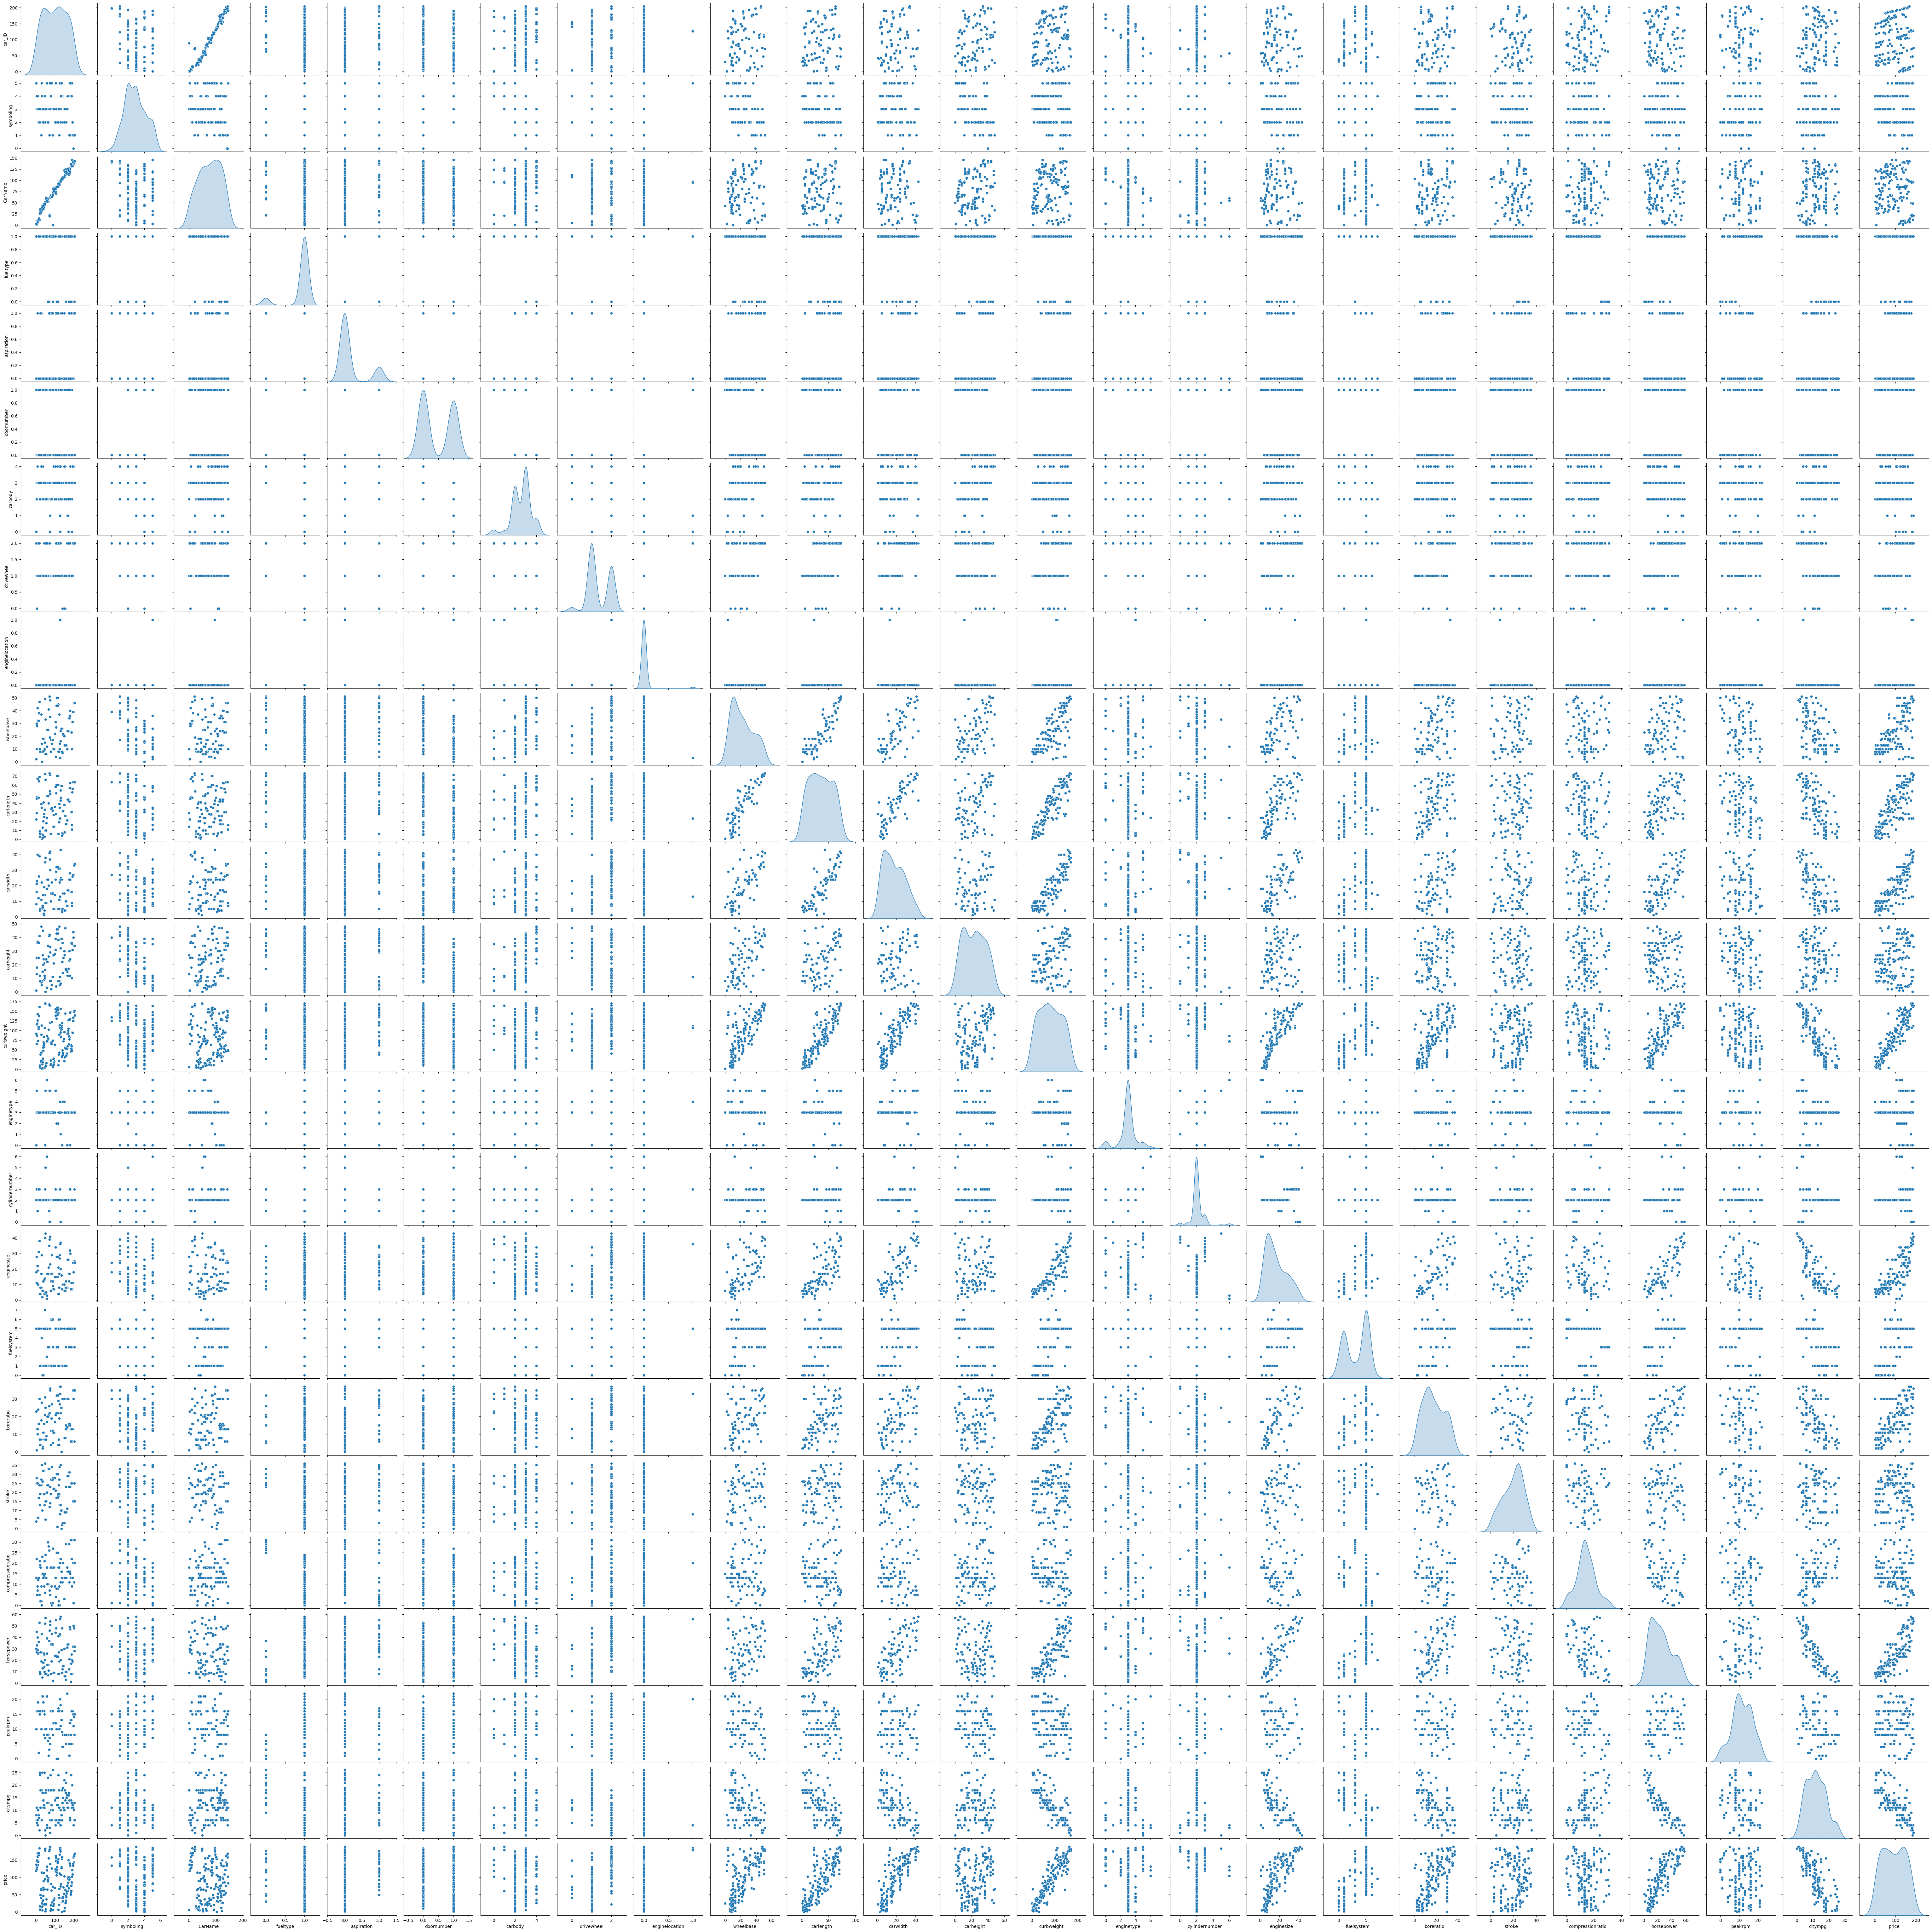

In [34]:
plt.figure(figsize=(10, 6))

df_pair = pd.concat([X_train.iloc[:, :-1], y_train], axis=1)

sns.pairplot(df_pair, diag_kind="kde")
plt.show()


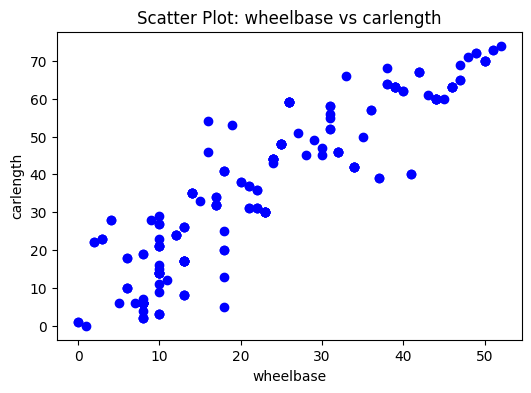

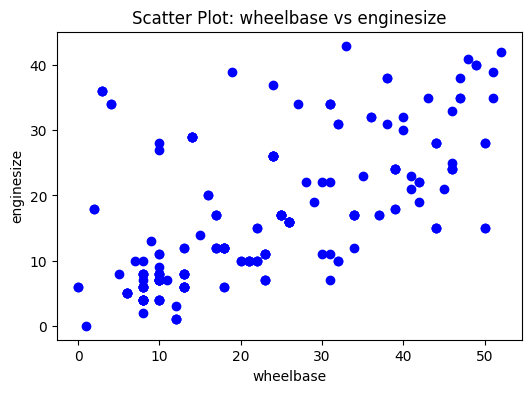

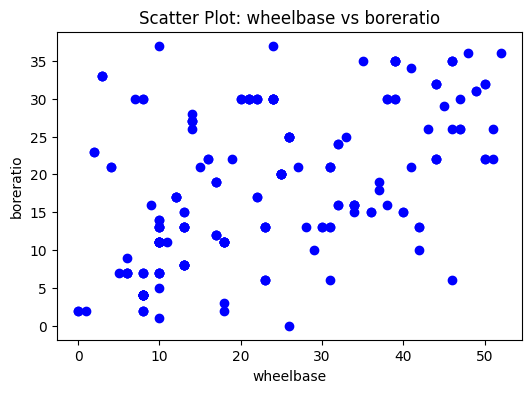

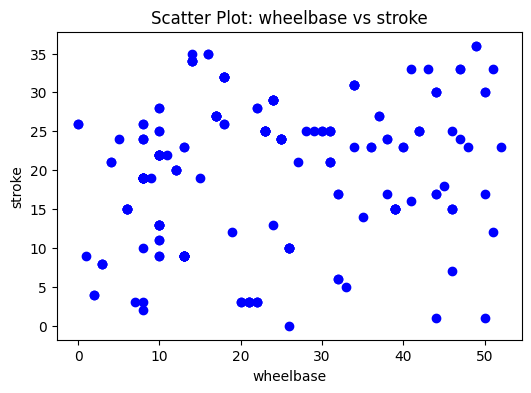

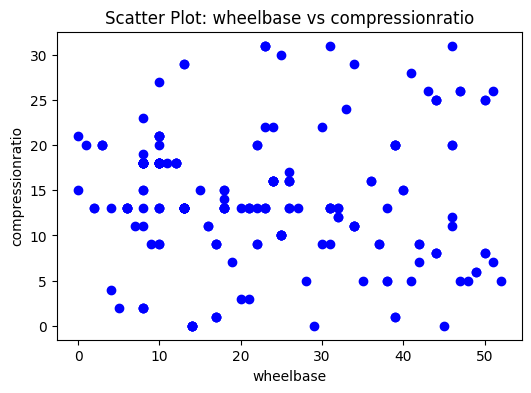

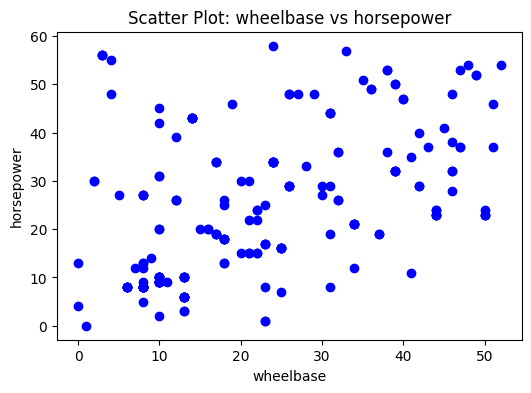

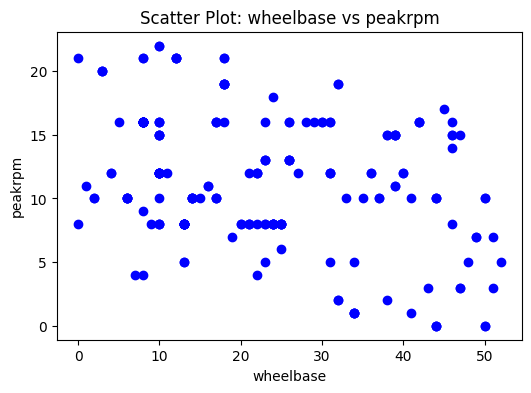

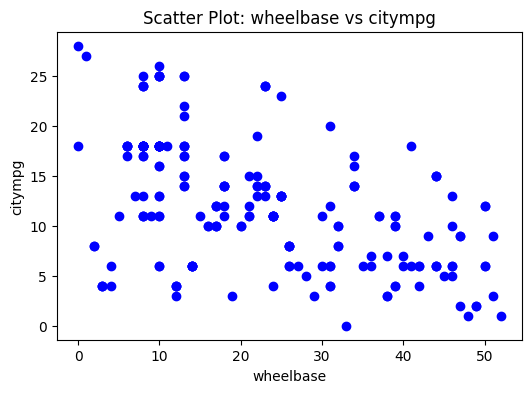

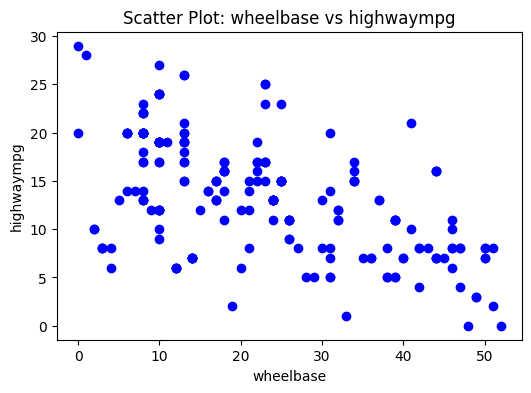

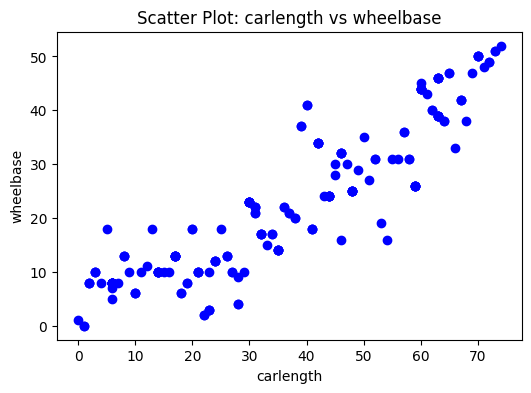

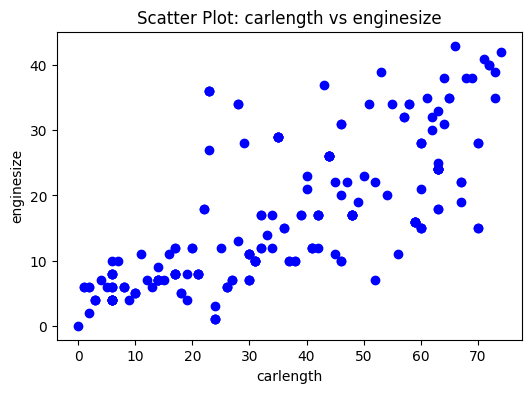

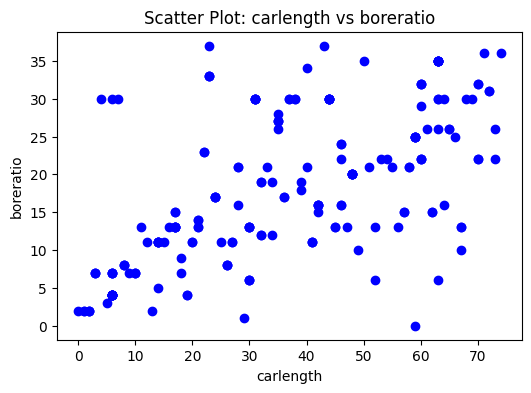

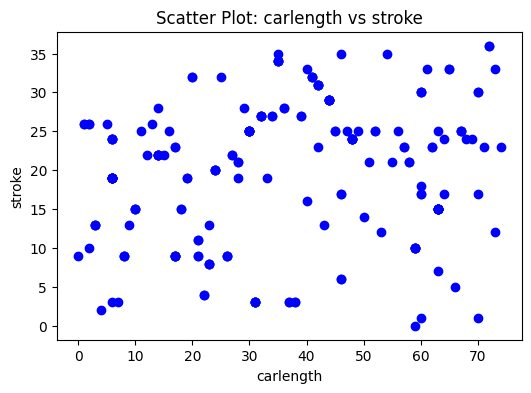

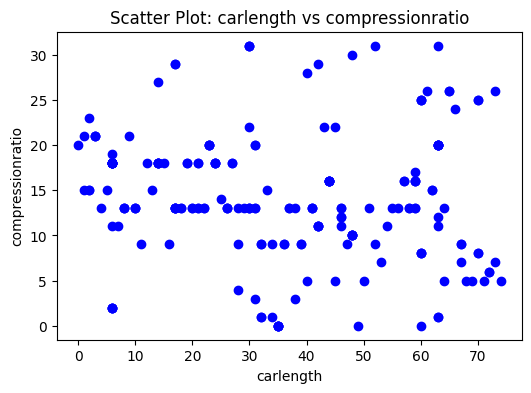

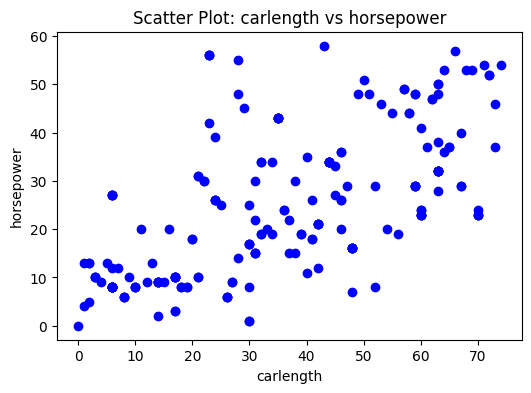

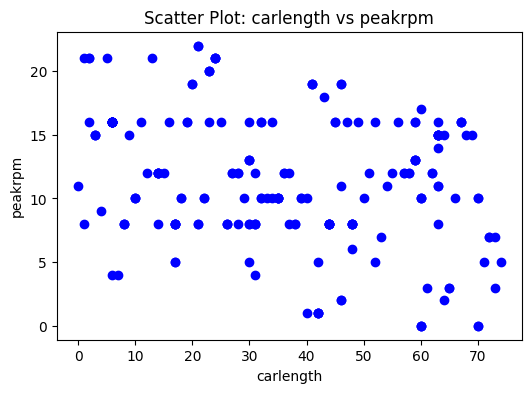

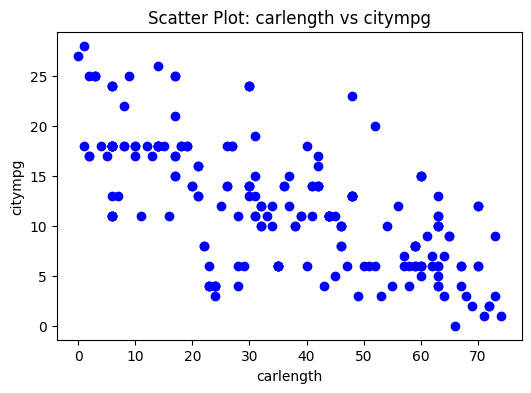

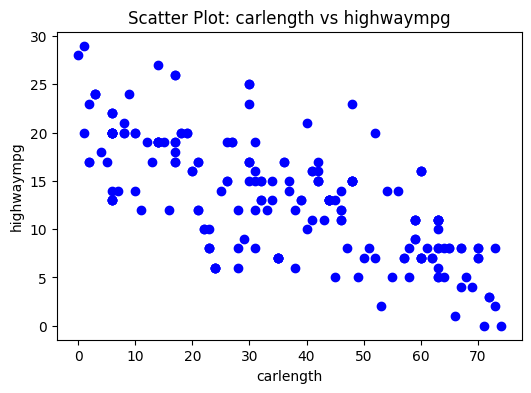

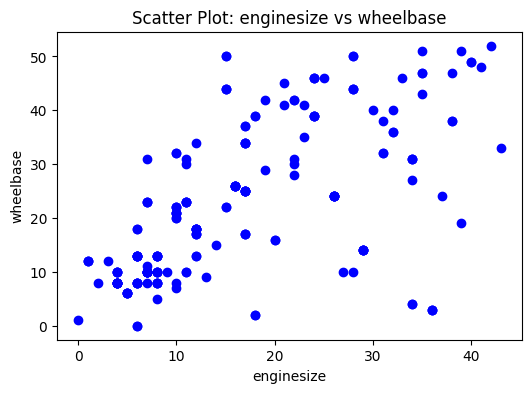

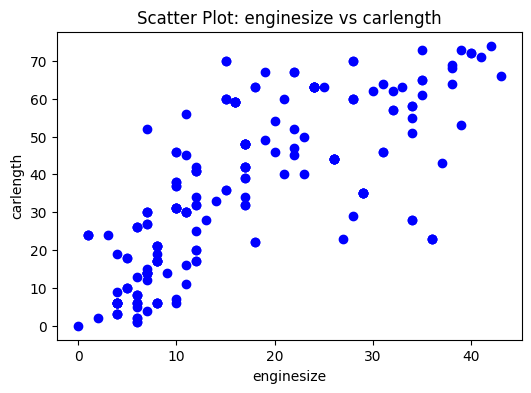

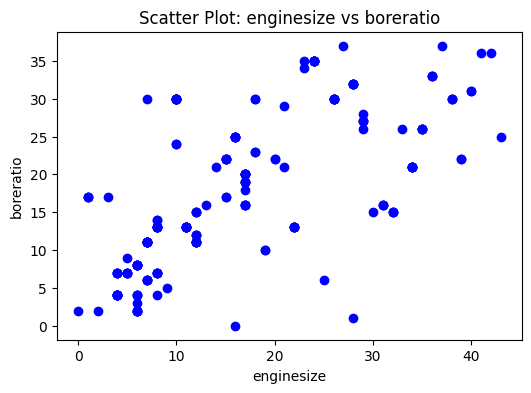

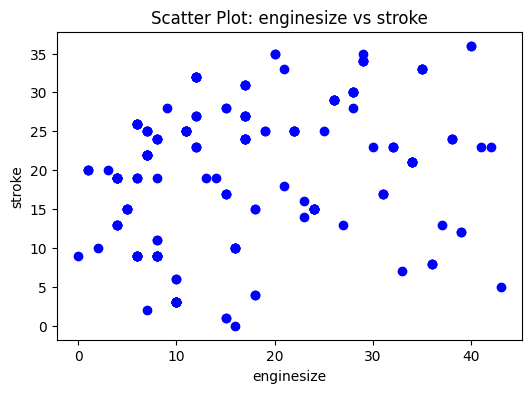

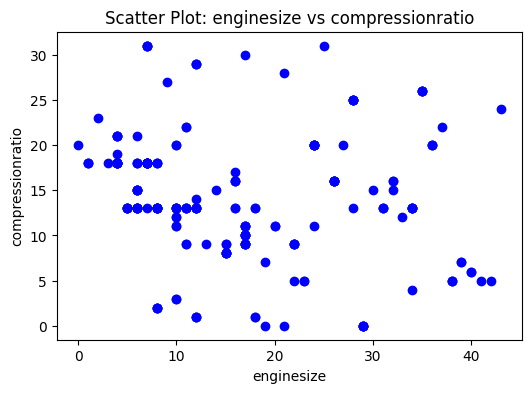

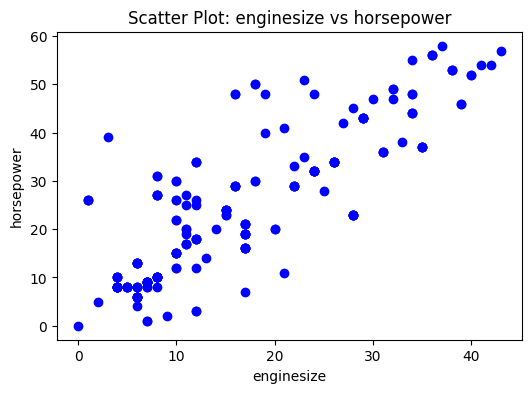

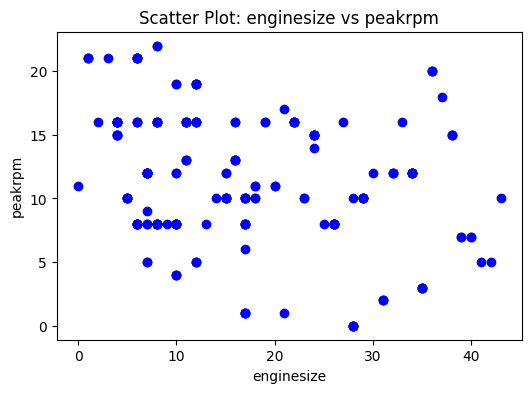

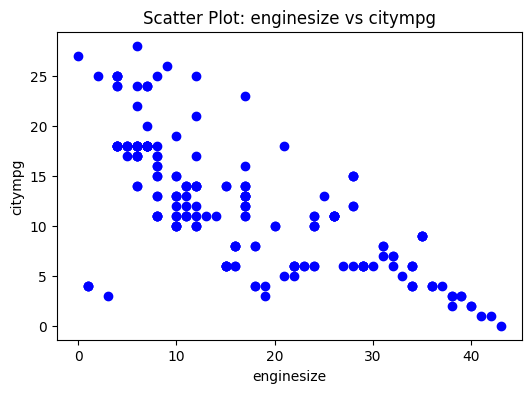

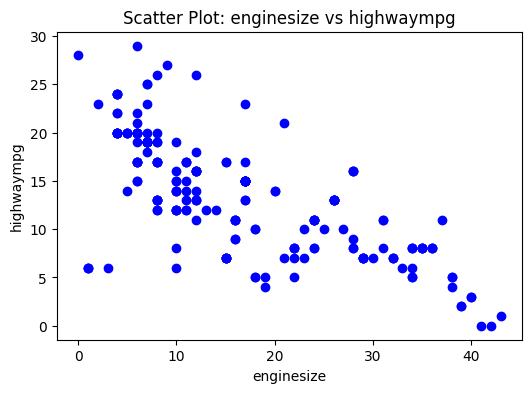

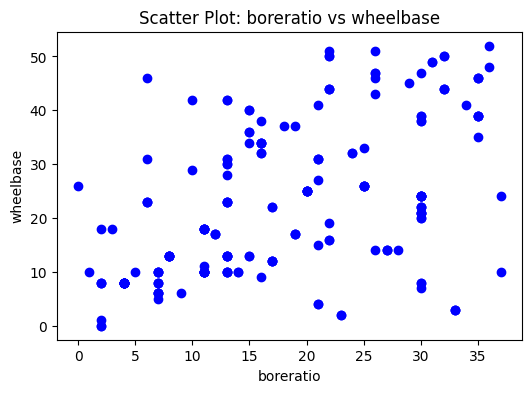

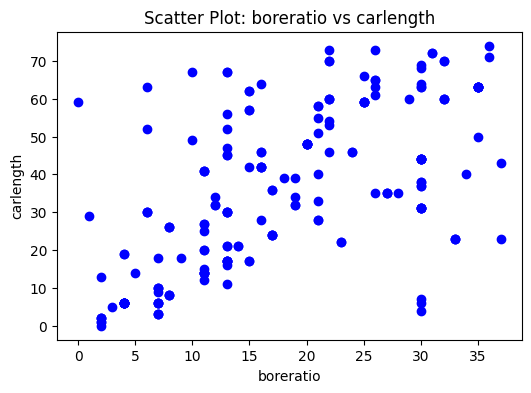

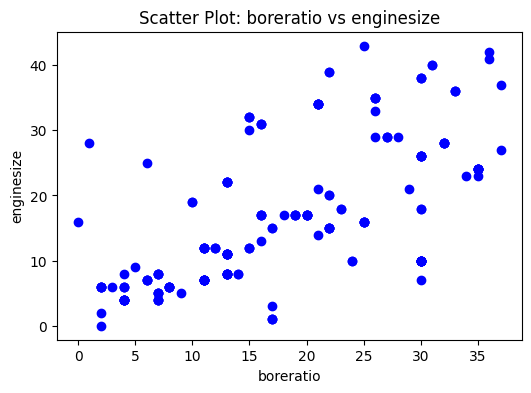

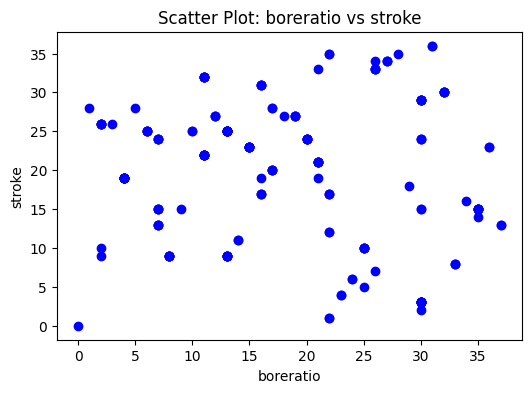

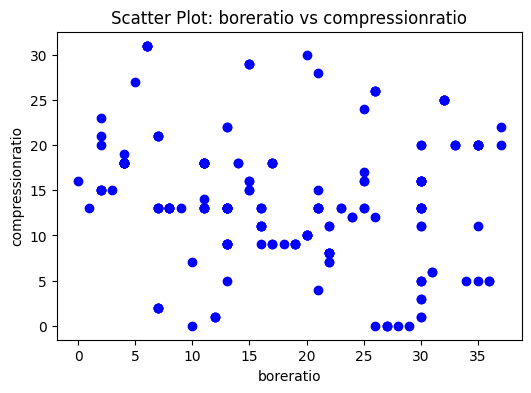

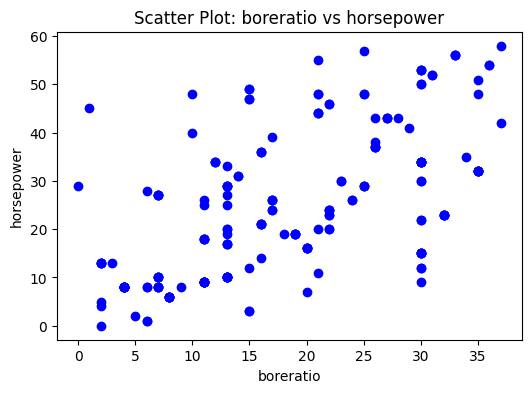

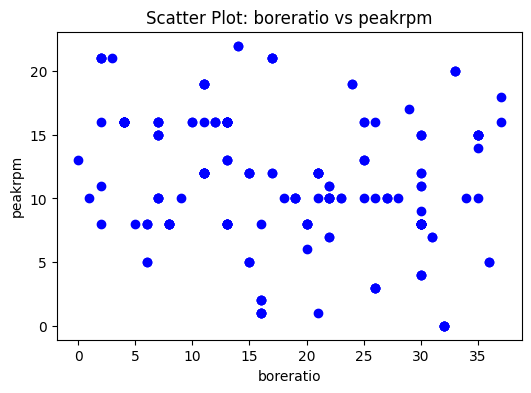

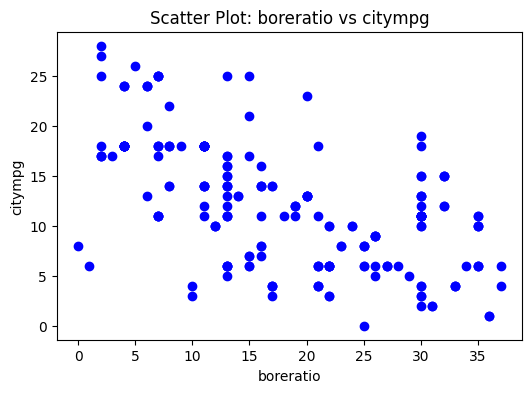

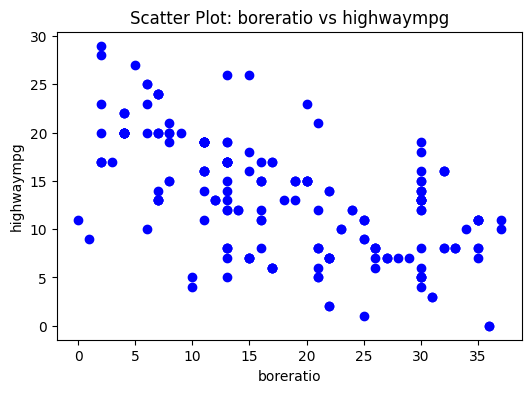

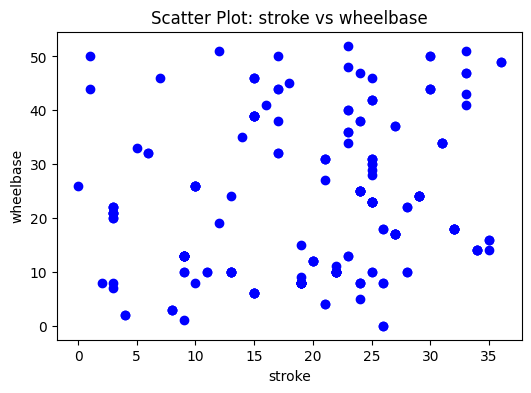

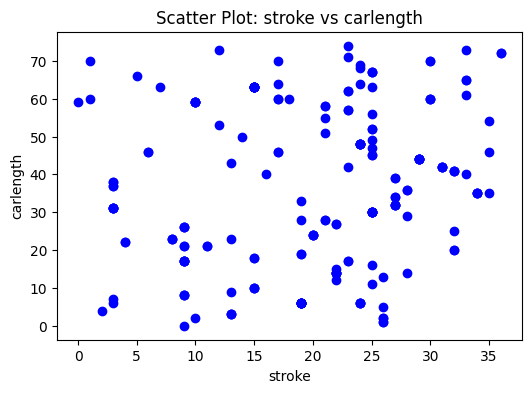

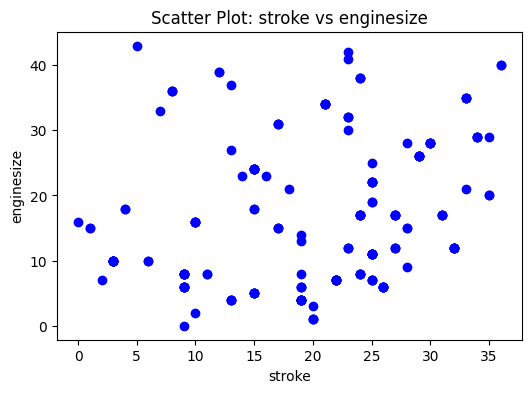

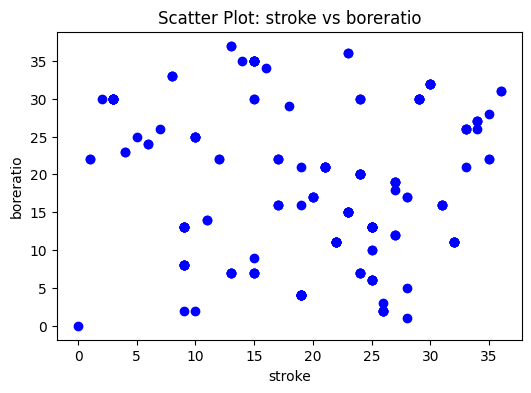

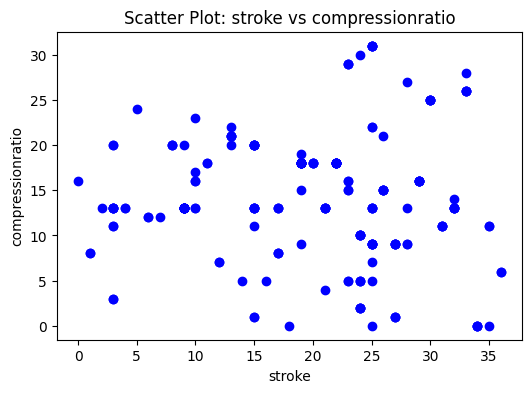

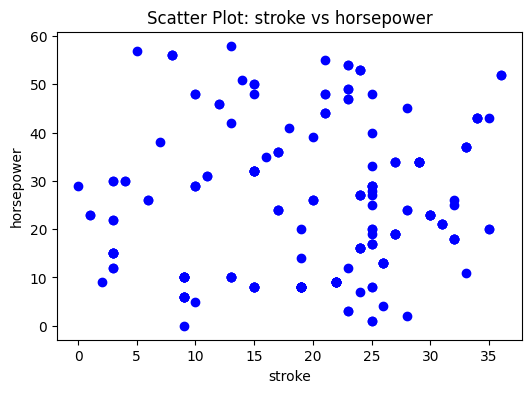

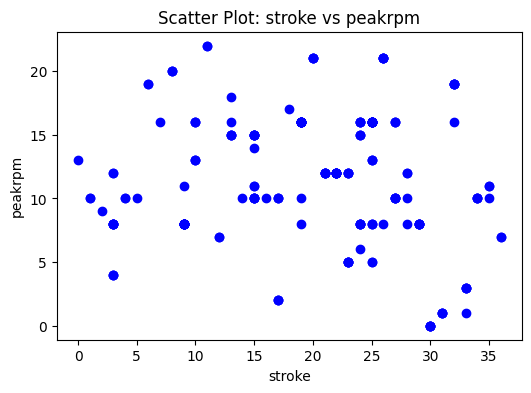

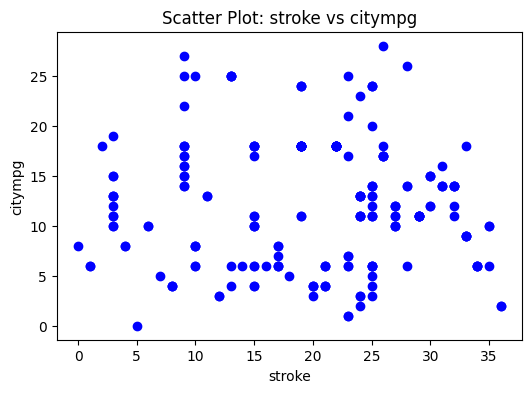

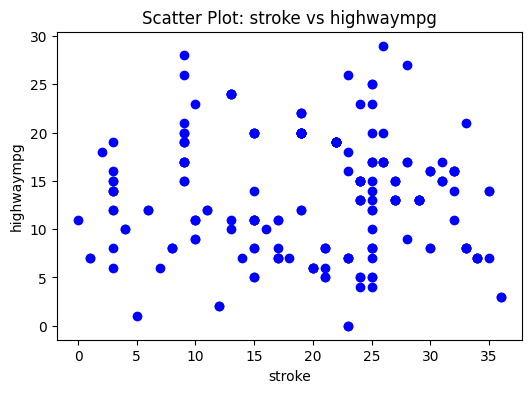

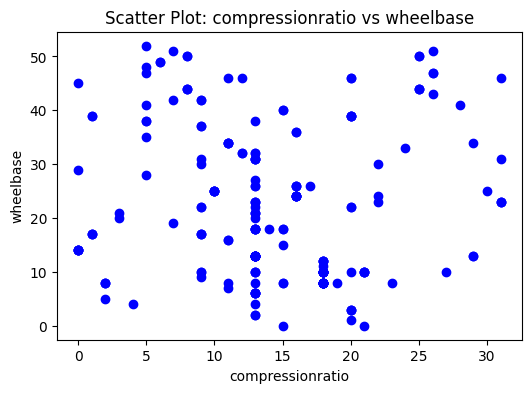

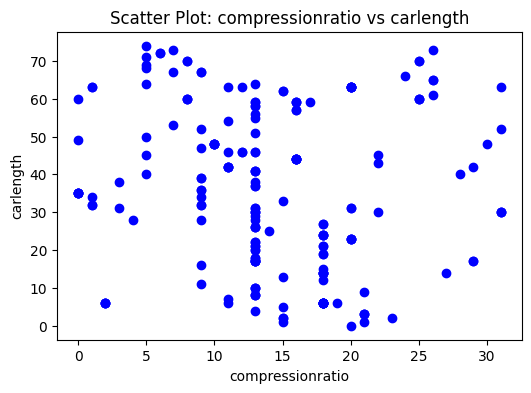

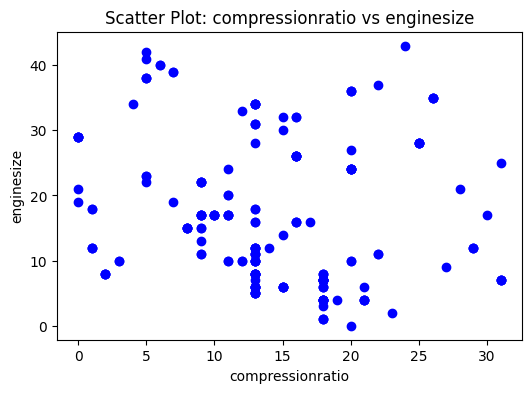

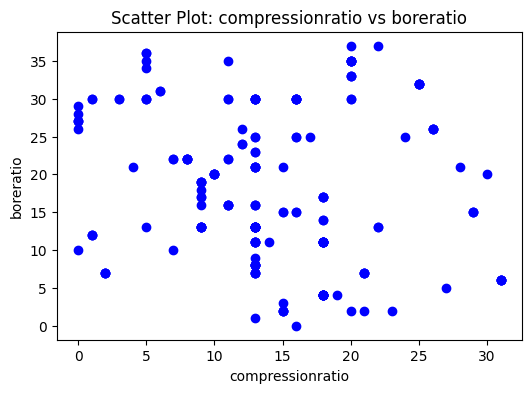

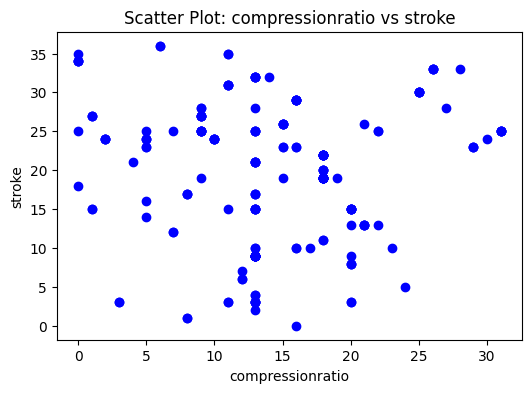

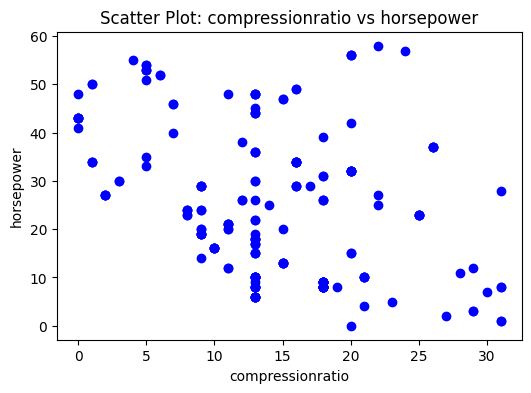

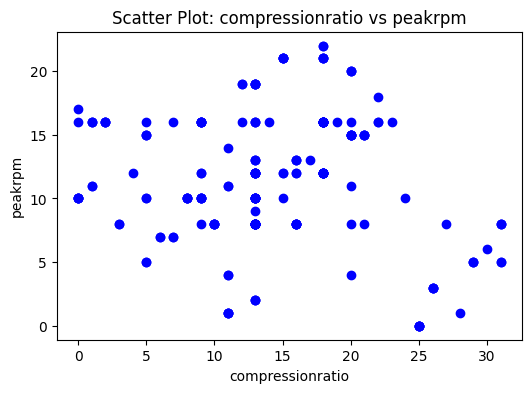

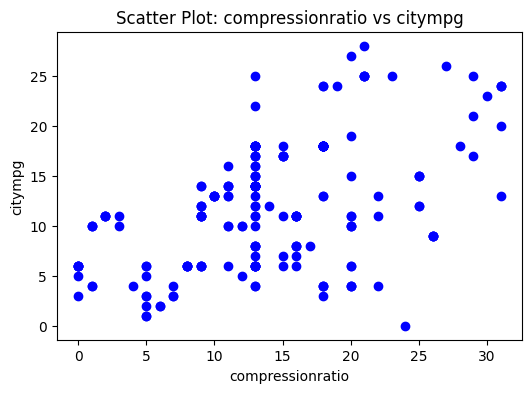

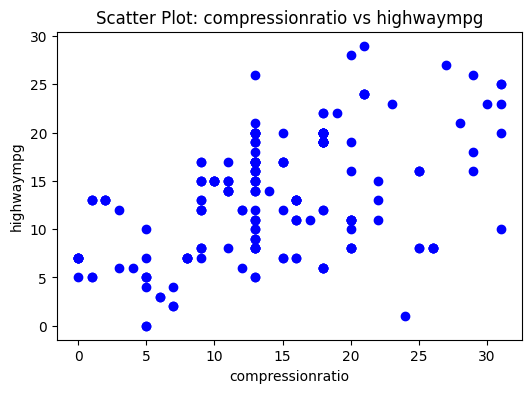

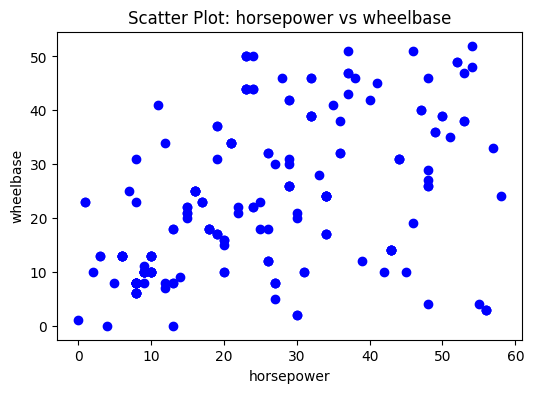

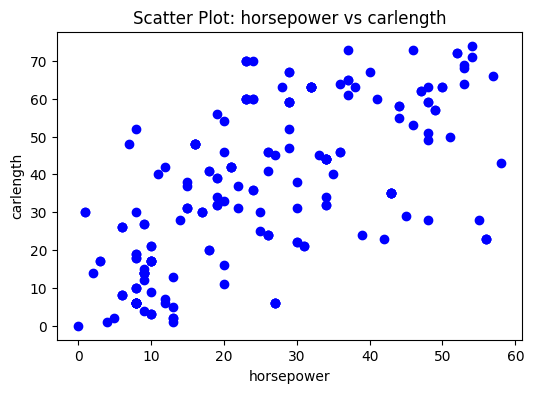

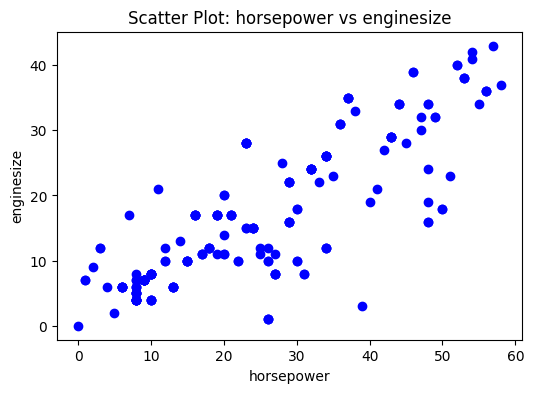

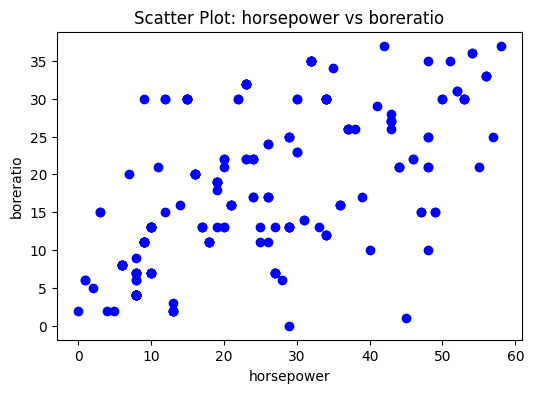

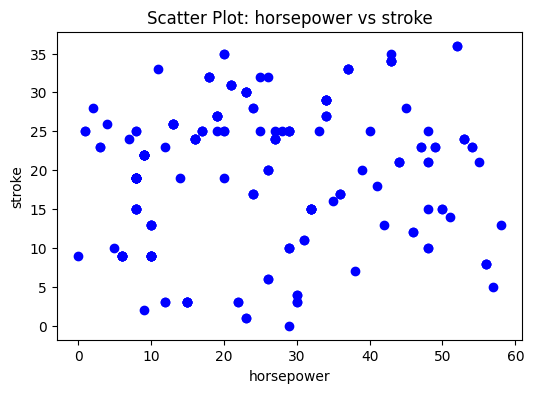

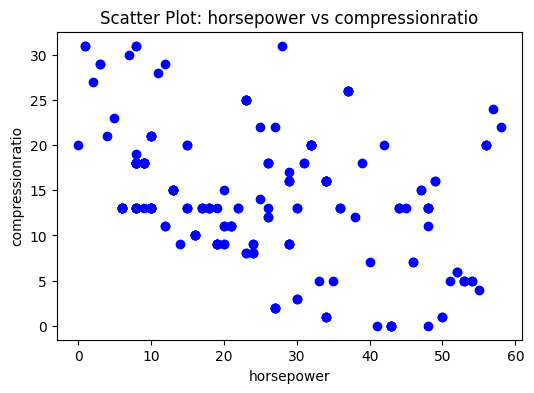

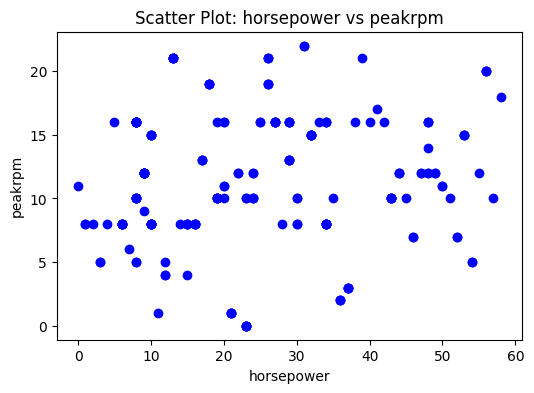

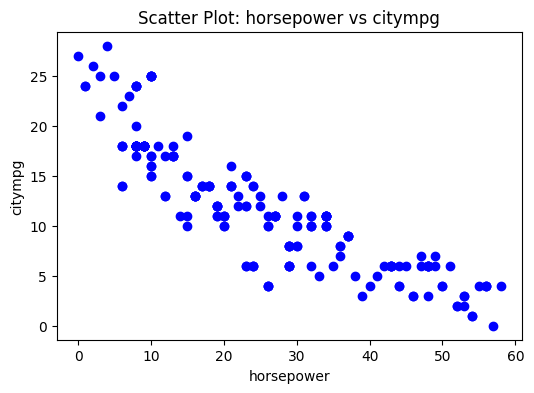

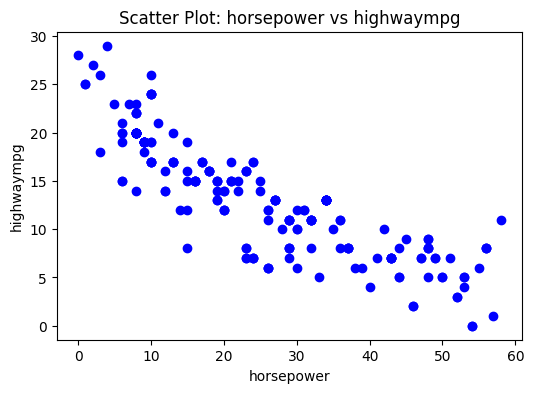

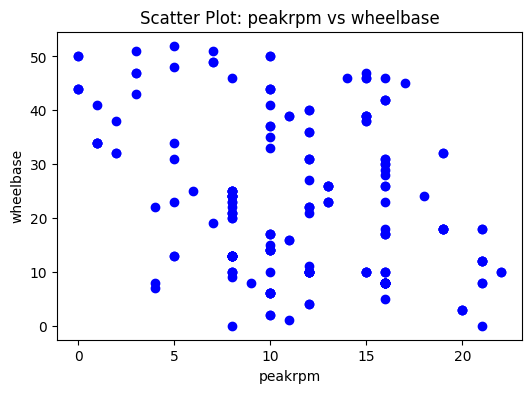

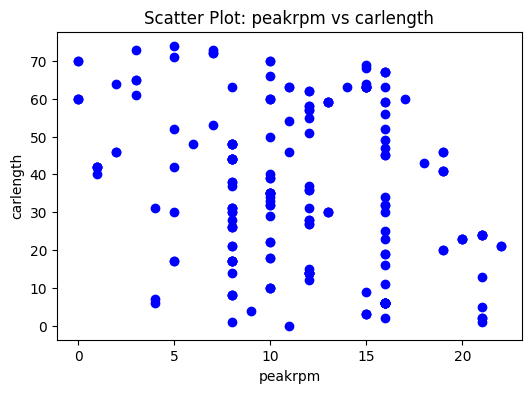

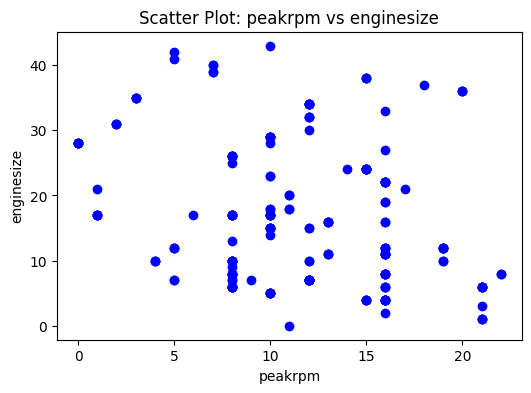

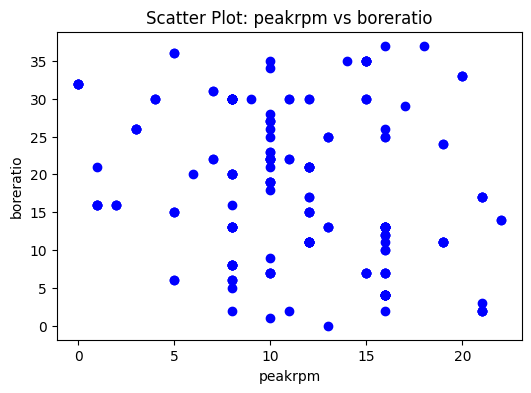

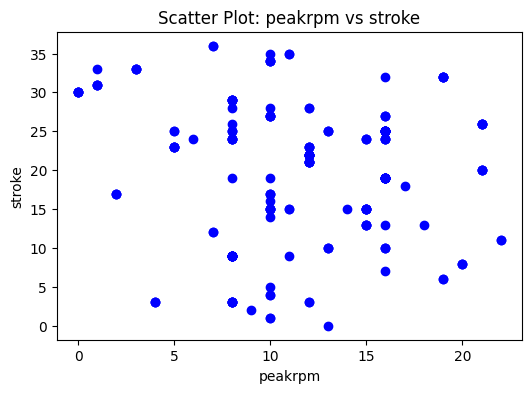

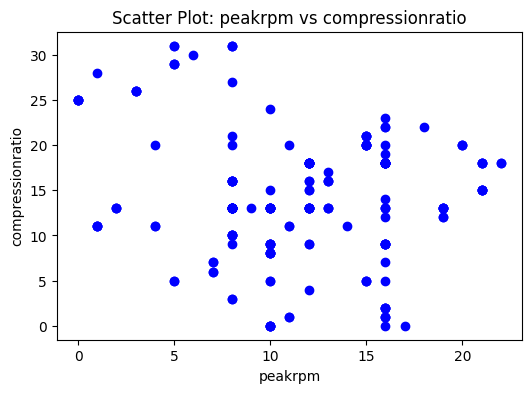

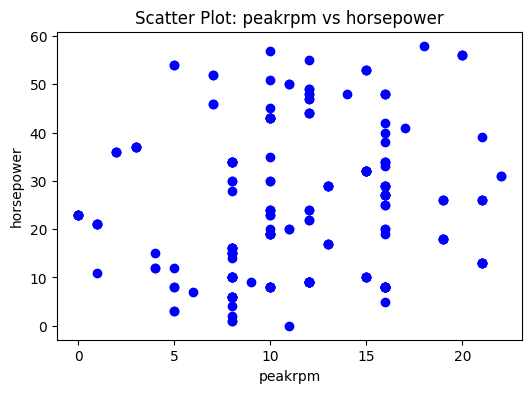

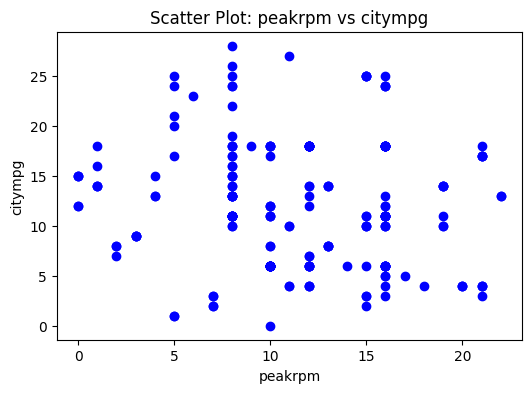

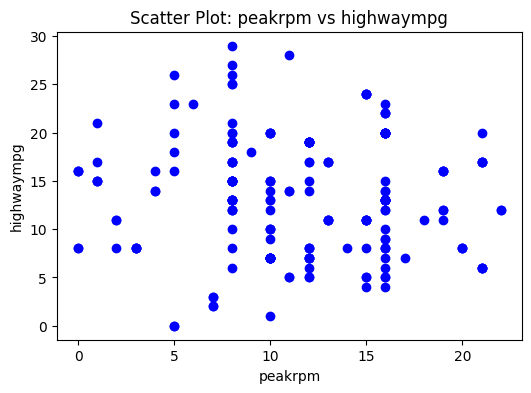

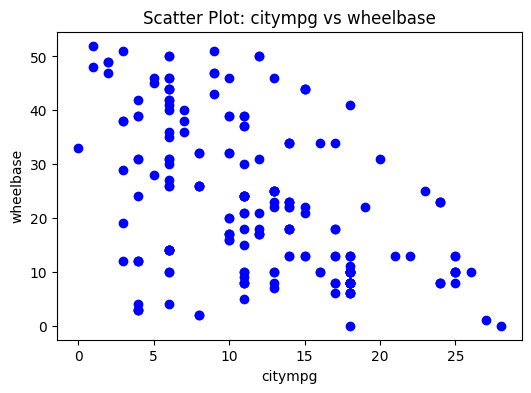

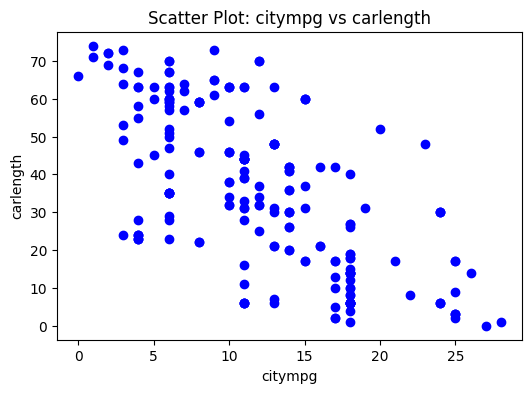

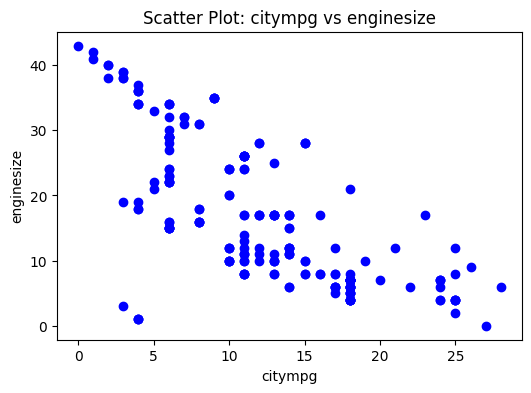

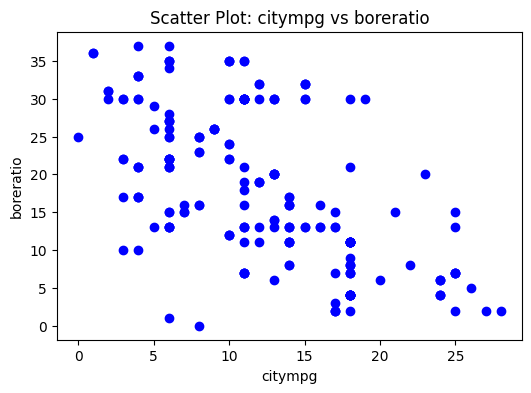

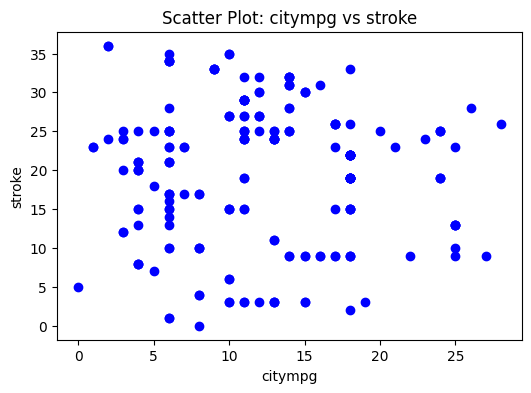

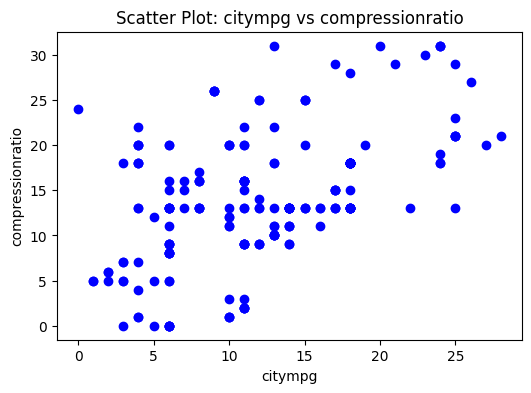

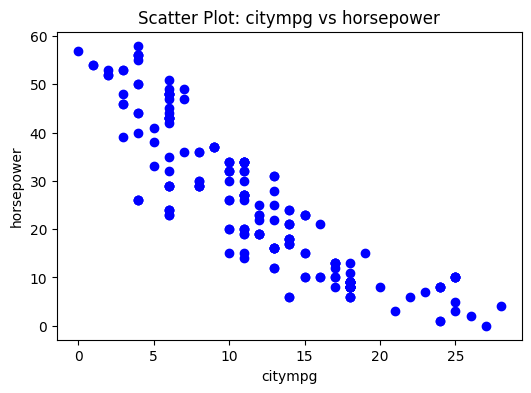

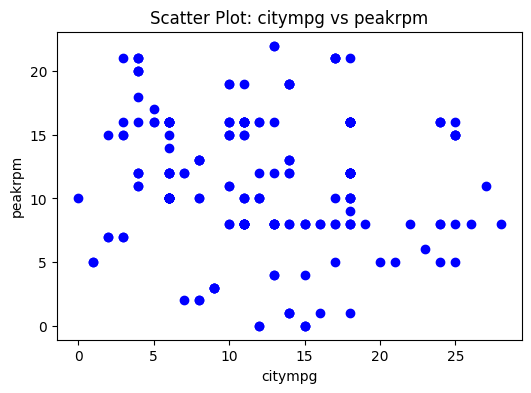

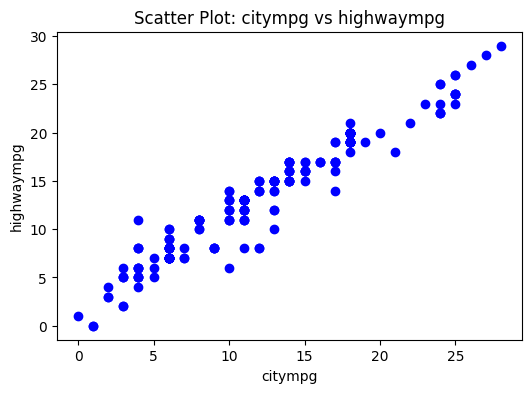

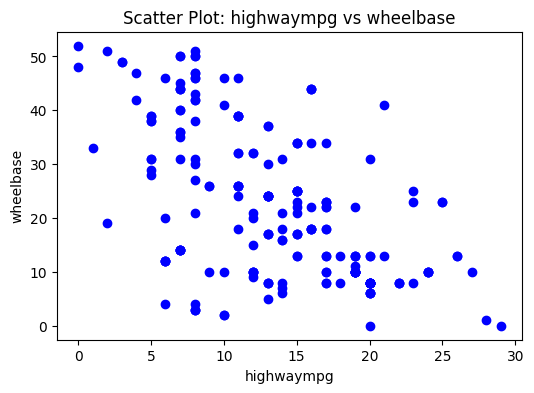

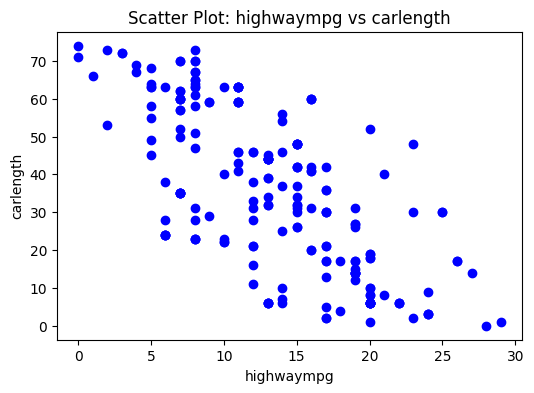

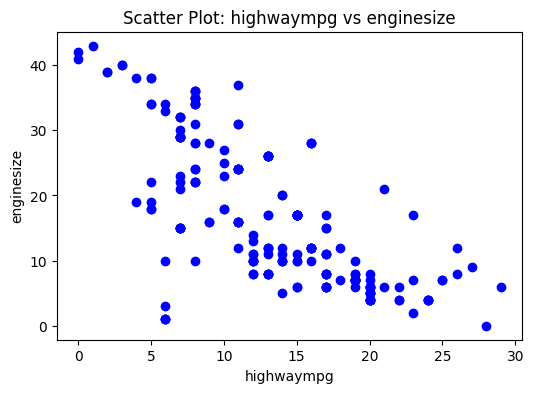

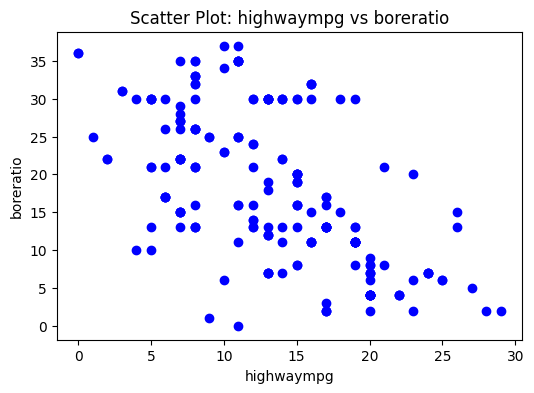

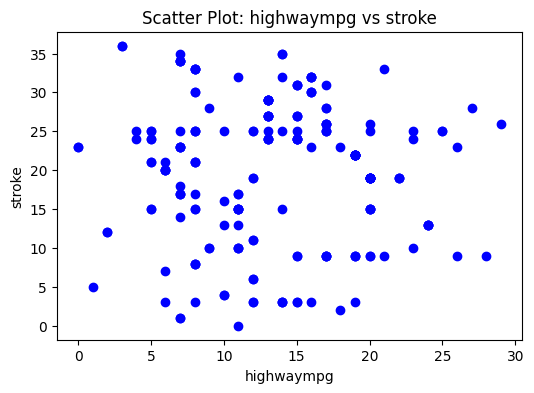

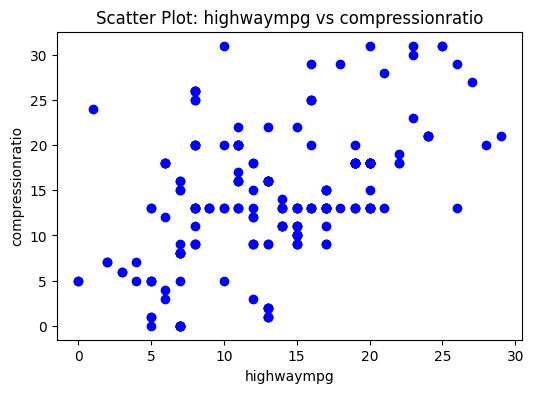

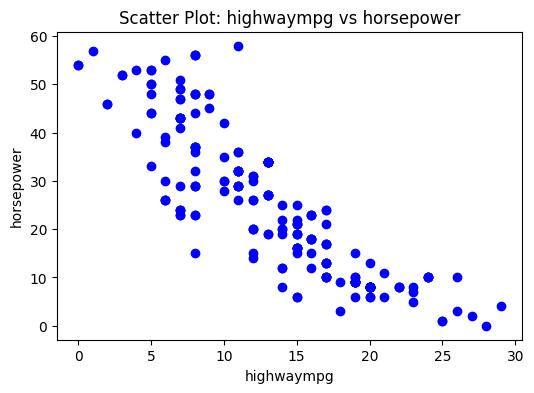

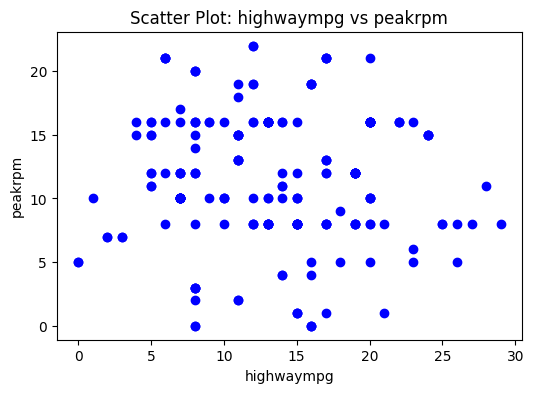

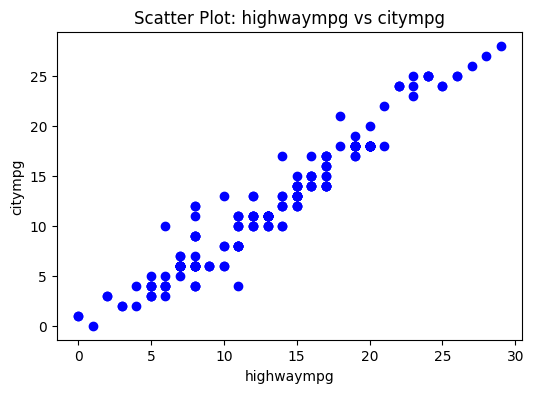

In [35]:
import matplotlib.pyplot as plt

numerical_features = ['wheelbase', 'carlength', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

for feature1 in numerical_features:
    for feature2 in numerical_features:
        if feature1 != feature2:  
            plt.figure(figsize=(6, 4))
            plt.scatter(df[feature1], df[feature2], color='blue', label='Data')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title(f'Scatter Plot: {feature1} vs {feature2}')
            plt.show()
